## [Study Title ******]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

##### dataframe manual clean-up:
"Ð" (5 iterations in df) = replaced with "-" manually using notepad++

In [2]:
df= pd.read_csv('data/global_health_outcomes.csv')

In [3]:
df

,Country,Infants exclusively breastfed (% ages 0-5 months) 2008-2013,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2013",Public health expenditure (% of GDP) 2013
0,Norway,NaN,1.0,7.0,2.3,2.8,NaN,47.0,73.0,NaN,0.1,NaN,24.0,37.4,9.6
1,Netherlands,NaN,1.0,4.0,3.3,4.0,NaN,54.0,69.0,NaN,0.2,NaN,23.5,31.5,12.9
2,Sweden,NaN,1.0,3.0,2.4,3.0,NaN,43.0,69.0,NaN,0.1,NaN,24.1,32.7,9.7
3,Korea (Republic of),NaN,1.0,1.0,3.2,3.7,2.5,38.0,93.0,0.0,5.4,NaN,24.0,21.4,7.2
4,Luxembourg,NaN,1.0,5.0,1.6,2.0,NaN,50.0,79.0,NaN,0.4,NaN,23.4,28.2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Chad,3.4,45.0,41.0,88.5,147.5,38.7,377.0,410.0,152.6,18.0,2.5,15.6,0.4,3.6
206,Somalia,9.1,48.0,54.0,89.8,145.6,42.1,289.0,339.0,33.5,64.0,0.5,16.1,0.4,NaN
207,Central African Republic,34.3,65.0,75.0,96.1,139.2,40.7,412.0,433.0,114.9,50.0,3.8,15.9,0.5,3.9
208,"Hong Kong, China (SAR)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,25.4,NaN,NaN


https://www.easytweaks.com/pandas-mean-column-dataframe/

In [23]:
#df.sort_index

In [4]:
df.describe().round()

,Infants exclusively breastfed (% ages 0-5 months) 2008-2013,Infants lacking immunization (% of one-year-olds) DTP 2013,Infants lacking immunization (% of one-year-olds) Measles 2013,"Mortality rates (per 1,000 live births) Infant 2013","Mortality rates (per 1,000 live births) Under-five 2013",Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013,"Adult mortality rate (per 1,000 people) Female 2013","Adult mortality rate (per 1,000 people) Male 2013","Deaths due to Malaria (per 100,000 people) 2012","Deaths due to Tuberculosis (per 100,000 people) 2012","HIV prevalence, adult (% ages 15-49) 2013",Life expectancy at age 60 (years) 2010/2015,"Physicians (per 10,000 people) 2001-2013",Public health expenditure (% of GDP) 2013
count,139.0,208.0,208.0,208.0,208.0,157.0,207.0,207.0,104.0,209.0,131.0,200.0,204.0,203.0
mean,36.0,7.0,12.0,26.0,35.0,24.0,141.0,203.0,32.0,13.0,2.0,19.0,16.0,7.0
std,18.0,10.0,13.0,23.0,36.0,14.0,97.0,100.0,39.0,20.0,5.0,3.0,15.0,3.0
min,1.0,1.0,1.0,2.0,2.0,1.0,36.0,54.0,0.0,0.0,0.0,12.0,0.0,1.0
25%,21.0,1.0,3.0,7.0,8.0,12.0,69.0,118.0,0.0,1.0,0.0,17.0,3.0,5.0
50%,35.0,3.0,7.0,16.0,19.0,23.0,105.0,186.0,8.0,4.0,1.0,19.0,12.0,6.0
75%,48.0,8.0,17.0,40.0,52.0,35.0,197.0,262.0,64.0,18.0,2.0,22.0,27.0,9.0
max,85.0,65.0,75.0,107.0,167.0,59.0,496.0,577.0,153.0,143.0,27.0,26.0,77.0,20.0


In [5]:
# output the minimum of each row in data frame
df.min(axis=0)

Country                                                                       Afghanistan
Infants exclusively breastfed (% ages 0-5 months) 2008-2013                           1.3
Infants lacking immunization (% of one-year-olds) DTP 2013                            1.0
Infants lacking immunization (% of one-year-olds) Measles 2013                        1.0
Mortality rates (per 1,000 live births) Infant 2013                                   1.6
Mortality rates (per 1,000 live births) Under-five 2013                               2.0
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013            1.3
Adult mortality rate (per 1,000 people) Female 2013                                  36.0
Adult mortality rate (per 1,000 people) Male 2013                                    54.0
Deaths due to Malaria (per 100,000 people) 2012                                       0.0
Deaths due to Tuberculosis (per 100,000 people) 2012                                  0.0
HIV preval

In [6]:
# output the minimum of each row in data frame
df.max(axis=0)

Country                                                                       Zimbabwe
Infants exclusively breastfed (% ages 0-5 months) 2008-2013                       84.9
Infants lacking immunization (% of one-year-olds) DTP 2013                        65.0
Infants lacking immunization (% of one-year-olds) Measles 2013                    75.0
Mortality rates (per 1,000 live births) Infant 2013                              107.2
Mortality rates (per 1,000 live births) Under-five 2013                          167.4
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013        59.3
Adult mortality rate (per 1,000 people) Female 2013                              496.0
Adult mortality rate (per 1,000 people) Male 2013                                577.0
Deaths due to Malaria (per 100,000 people) 2012                                  152.6
Deaths due to Tuberculosis (per 100,000 people) 2012                             143.0
HIV prevalence, adult (% ages 15-49) 2013  

In [7]:
df.columns

Index(['Country',
       'Infants exclusively breastfed (% ages 0-5 months) 2008-2013',
       'Infants lacking immunization (% of one-year-olds) DTP 2013',
       'Infants lacking immunization (% of one-year-olds) Measles 2013',
       'Mortality rates (per 1,000 live births) Infant 2013',
       'Mortality rates (per 1,000 live births) Under-five 2013',
       'Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013',
       'Adult mortality rate (per 1,000 people) Female 2013',
       'Adult mortality rate (per 1,000 people) Male 2013',
       'Deaths due to Malaria (per 100,000 people) 2012',
       'Deaths due to Tuberculosis (per 100,000 people) 2012',
       'HIV prevalence, adult (% ages 15-49) 2013',
       'Life expectancy at age 60 (years) 2010/2015',
       'Physicians (per 10,000 people) 2001-2013',
       'Public health expenditure (% of GDP) 2013'],
      dtype='object')

In [8]:
df.mean(axis=0)

Infants exclusively breastfed (% ages 0-5 months) 2008-2013                    36.164029
Infants lacking immunization (% of one-year-olds) DTP 2013                      6.735577
Infants lacking immunization (% of one-year-olds) Measles 2013                 11.980769
Mortality rates (per 1,000 live births) Infant 2013                            26.030769
Mortality rates (per 1,000 live births) Under-five 2013                        35.277404
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013     24.262420
Adult mortality rate (per 1,000 people) Female 2013                           140.874396
Adult mortality rate (per 1,000 people) Male 2013                             202.927536
Deaths due to Malaria (per 100,000 people) 2012                                31.749038
Deaths due to Tuberculosis (per 100,000 people) 2012                           13.291866
HIV prevalence, adult (% ages 15-49) 2013                                       2.121374
Life expectancy at ag

In [9]:
df.std(axis=0)

Infants exclusively breastfed (% ages 0-5 months) 2008-2013                    18.481291
Infants lacking immunization (% of one-year-olds) DTP 2013                      9.628474
Infants lacking immunization (% of one-year-olds) Measles 2013                 13.012057
Mortality rates (per 1,000 live births) Infant 2013                            23.494154
Mortality rates (per 1,000 live births) Under-five 2013                        35.717020
Child malnutrition (% under age 5) Stunting (moderate or severe) 2008-2013     14.259726
Adult mortality rate (per 1,000 people) Female 2013                            97.495550
Adult mortality rate (per 1,000 people) Male 2013                             100.186038
Deaths due to Malaria (per 100,000 people) 2012                                39.285900
Deaths due to Tuberculosis (per 100,000 people) 2012                           20.347072
HIV prevalence, adult (% ages 15-49) 2013                                       4.527591
Life expectancy at ag

In [10]:
print (df.describe())

       Infants exclusively breastfed (% ages 0-5 months) 2008-2013  \
count                                         139.000000             
mean                                           36.164029             
std                                            18.481291             
min                                             1.300000             
25%                                            20.750000             
50%                                            34.700000             
75%                                            48.250000             
max                                            84.900000             

       Infants lacking immunization (% of one-year-olds) DTP 2013  \
count                                         208.000000            
mean                                            6.735577            
std                                             9.628474            
min                                             1.000000            
25%                     

---

array([[<AxesSubplot:title={'center':'Physicians (per 10,000 people) 2001-2013'}>]],
      dtype=object)

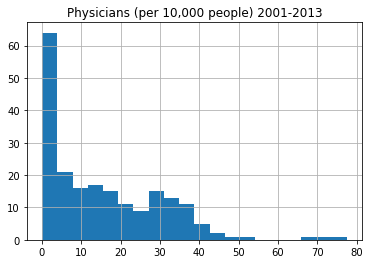

In [11]:
df.hist(column='Physicians (per 10,000 people) 2001-2013', bins = 20)

In [12]:
# create a random array with the mean and std. dev. of the original data
Physicians_per_100K = np.random.normal(loc=15.787255, scale=14.877931, size=1000)

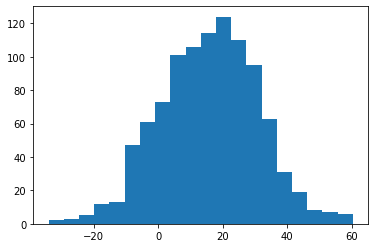

In [13]:
plt.hist(Physicians_per_100K, bins = 20)
plt.show()

---

array([[<AxesSubplot:title={'center':'Public health expenditure (% of GDP) 2013'}>]],
      dtype=object)

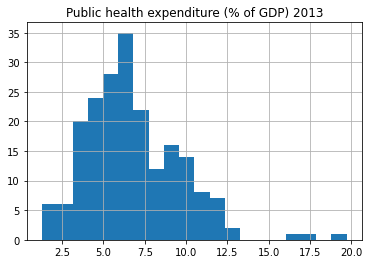

In [14]:
df.hist(column='Public health expenditure (% of GDP) 2013', bins = 20)

In [15]:
# create a random array with the mean and std. dev. of the original data
Public_health_expenditure_percent_GDP = np.random.normal(loc=6.767980, scale=2.838771, size=1000)

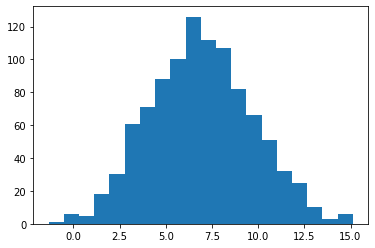

In [16]:
plt.hist(Public_health_expenditure_percent_GDP, bins = 20)
plt.show()

---

array([[<AxesSubplot:title={'center':'Life expectancy at age 60 (years) 2010/2015'}>]],
      dtype=object)

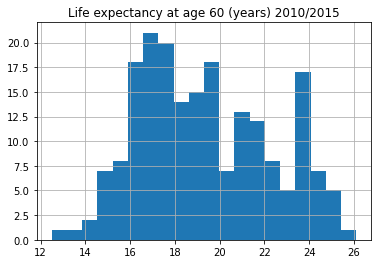

In [17]:
df.hist(column='Life expectancy at age 60 (years) 2010/2015', bins = 20)

In [18]:
# create a random array with the mean and std. dev. of the original data
Life_Expectancy_at_60 = np.random.normal(loc=19.355500, scale=2.938134, size=1000)

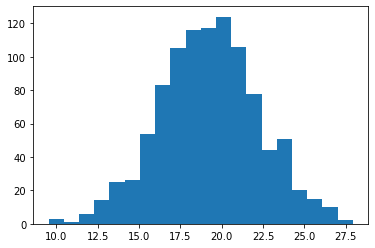

In [19]:
plt.hist(Life_Expectancy_at_60, bins = 20)
plt.show()

---

C:\Users\polma\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\polma\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\polma\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\polma\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\polma\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\polma\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

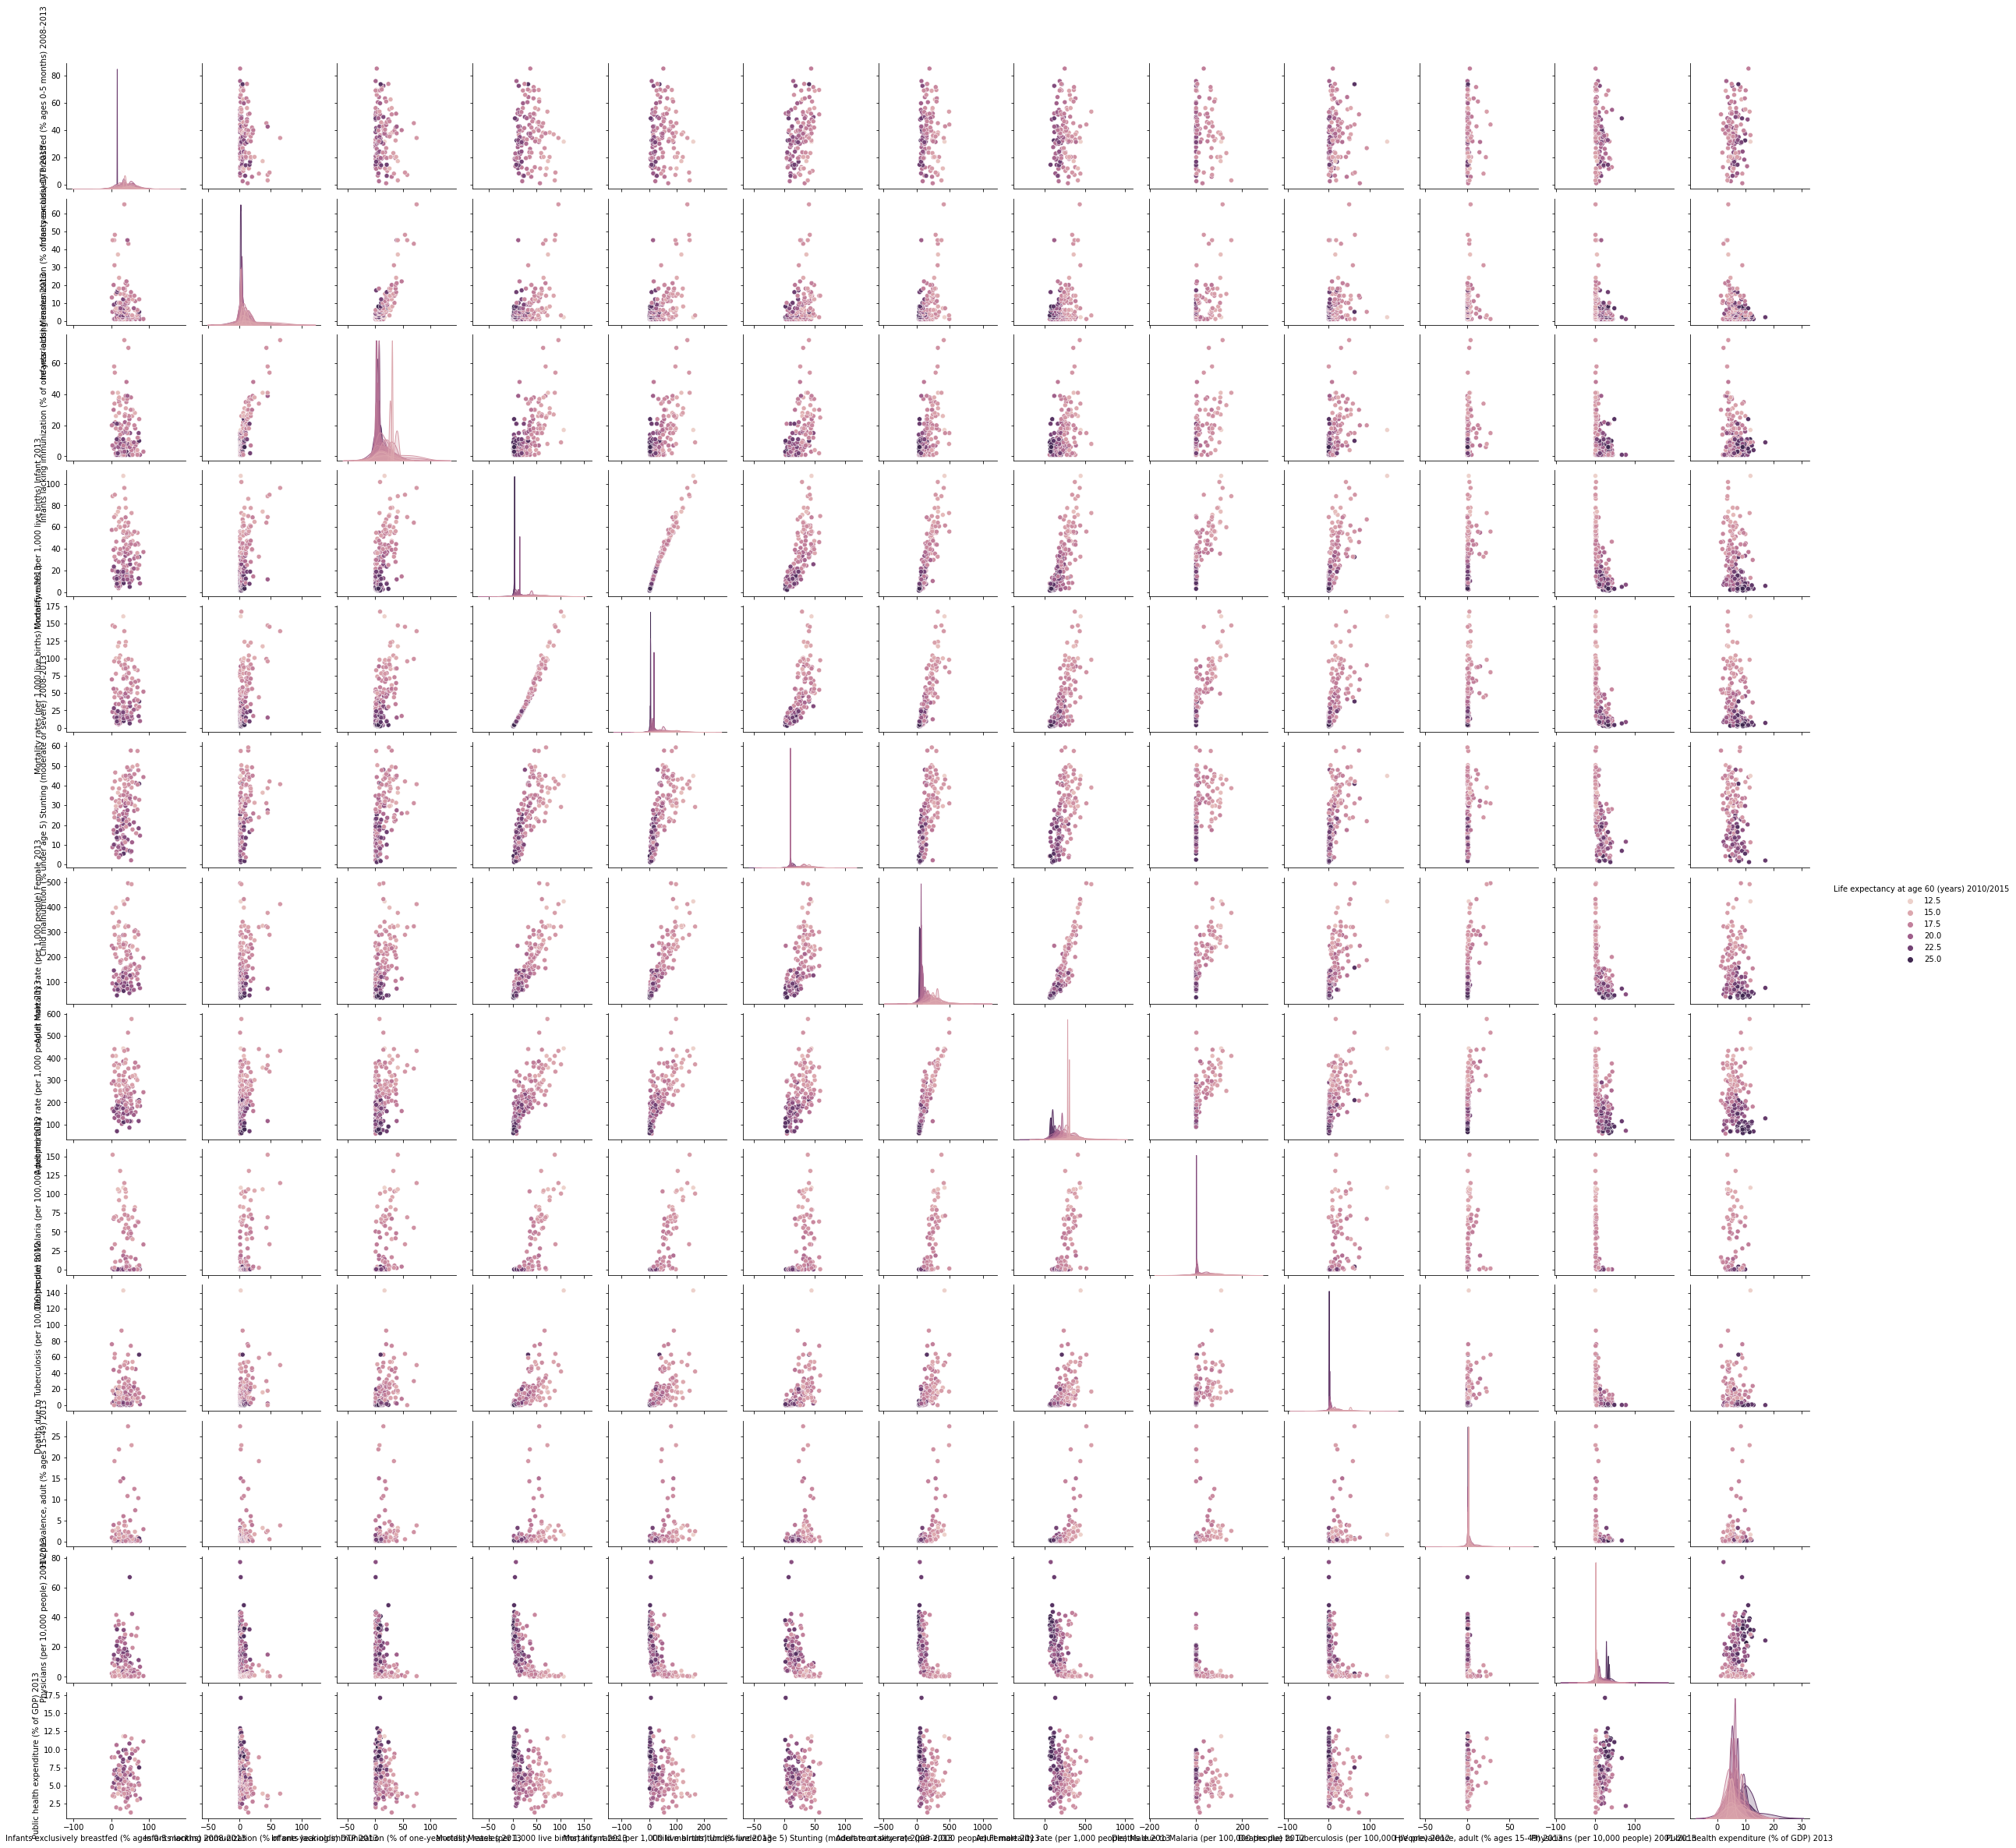

In [25]:
sns.color_palette("Spectral", as_cmap=True)
sns.pairplot(df, hue= 'Life expectancy at age 60 (years) 2010/2015')

---

In [20]:
df2= pd.read_csv('data/GDP_per_Capita.csv')

In [21]:
df2

,,2000,2001,2002,2003,2004,2005,2006,2007,Unnamed: 9,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,..,..,179.4,190.7,211.4,242.0,263.7,359.7,NaN,364.7,437.3,543.3,591.2,638.8,624.3,614.2,556.0
1,Albania,"1,126.7","1,281.7","1,425.1","1,846.1","2,373.6","2,673.8","2,972.7","3,595.0",NaN,"4,370.5","4,114.1","4,094.3","4,437.1","4,247.6","4,413.1","4,578.6","3,952.8"
2,Algeria,"1,765.0","1,740.6","1,781.8","2,103.4","2,610.2","3,113.1","3,478.7","3,950.5",NaN,"4,923.6","3,883.3","4,480.8","5,455.7","5,592.2","5,499.6","5,493.1","4,177.9"
3,American Samoa,..,..,"8,666.7","8,807.5","8,528.2","8,395.3","8,340.5","8,874.9",NaN,"9,740.8","11,910.0","10,216.8","10,223.3","11,496.5","11,450.7","11,525.2","12,059.6"
4,Andorra,"21,854.2","22,970.5","25,067.2","32,272.8","37,966.2","40,064.2","42,674.8","47,804.8",NaN,"48,719.7","43,504.2","40,850.2","43,334.8","38,686.5","39,540.7","41,303.9","35,770.8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,West Bank and Gaza,"1,476.2","1,335.6","1,156.2","1,257.7","1,422.2","1,543.7","1,570.1","1,664.2",NaN,"2,035.2","2,191.8","2,557.1","2,880.8","3,067.4","3,315.3","3,352.1","3,272.2"
214,"Yemen, Rep.",554.4,550.4,579.9,620.4,710.0,832.8,921.4,"1,017.3",NaN,"1,229.2","1,116.1","1,334.8","1,374.6","1,446.5","1,607.2","1,674.0","1,601.8"
215,Zambia,345.7,382.9,382.2,435.5,538.6,702.7,"1,047.9","1,124.3",NaN,"1,394.0","1,159.9","1,489.5","1,672.9","1,763.1","1,878.3","1,762.4","1,338.3"
216,Zimbabwe,563.1,568.4,530.5,478.0,483.0,476.6,447.9,431.8,NaN,356.7,771.6,948.3,"1,093.7","1,305.0","1,430.0","1,434.9","1,445.1"


#### References

Original CSV file: https://data.world/hdro/d41b5824-e40e-4fd6-9c8f-900eb2616f3c/workspace/project-summary?agentid=hdro&datasetid=d41b5824-e40e-4fd6-9c8f-900eb2616f3c

GDP & Life Expectancy: <br>
https://databank.worldbank.org/home.aspx <br>
https://databank.worldbank.org/databases/health


Source: https://data.humdata.org/dataset/health-outcomes
Last updated at https://data.humdata.org/organization/undp-human-development-reports-office : 2021-09-23

License -
Creative Commons Attribution for Intergovernmental Organisations


The demand for good-quality statistical data continues to increase. Timely and reliable statistics are key inputs to the broad development strategy. Improvements in the quality and quantity of data on all aspects of development are essential if we are to achieve the goal of a world without poverty.

Good data are needed to set baselines, identify effective public and private actions, set goals and targets, monitor progress and evaluate impacts. They are also an essential tool of good government, providing means for people to assess what governments do and helping them to participate directly in the development process.

At the World Bank, the Development Data Group coordinates statistical and data work and maintains a number of macro, financial and sector databases. Working closely with the Bank’s regions and Global Practices, the group is guided by professional standards in the collection, compilation and dissemination of data to ensure that all data users can have confidence in the quality and integrity of the data produced.

Much of the data comes from the statistical systems of member countries, and the quality of global data depends on how well these national systems perform. The World Bank works to help developing countries improve the capacity, efficiency and effectiveness of national statistical systems. Without better and more comprehensive national data, it is impossible to develop effective policies, monitor the implementation of poverty reduction strategies, or monitor progress towards global goals.

Measurement of Development Progress
World Bank databases are essential tools for supporting critical management decisions and providing key statistical information for Bank operational activities. The application of internationally accepted standards and norms results in a consistent, reliable source of information.

Global Statistical Strategy
To be of use, statistics must be both reliable and relevant. They need to be compiled correctly, following standard practices and methodology. They must also meet the needs of users and answer the questions posed by policymakers.

Developing countries face a number of problems in providing statistics that meet these criteria. They often find themselves caught in a vicious cycle—under-investment in national statistical systems constrains activities and results in data of poor quality, which policymakers are unwilling to rely on. This lack of demand for the data leads to fewer resources being made available for their production and quality control. The World Bank is committed to helping developing countries break out of this cycle. Our work includes investments in statistical activities, creating and implementing standards and frameworks for data collection, analysis and dissemination, strengthening the international statistical system, and compiling global data sets.

There is also much to be done in raising awareness of the value of statistics among governments, decision makers and other users. As advocates for statistics, we work in close partnership with developing countries and our partners in the international community.

A priority of the World Bank’s efforts to improve the statistical infrastructure of developing countries is the preparation of national strategies for the development of statistics as recommended in the Marrakech Action Plan for Statistics. These country-driven plans look at the needs of the whole statistical system and provide the basis for coordinated and prioritized donor assistance. Other components of the World Bank’s statistical capacity building program include:

Improving Statistical Capacity
Trust Fund for Statistical Capacity Building
International Comparison Program
The International System
The World Bank works closely with the international statistical community including the agencies of the United Nations (UN), the Organisation for Economic Co-Operation and Development (OECD), the International Monetary Fund (IMF), the regional development banks, and donors by:

Participating in the UN Statistical Commission and other statistical forums to develop appropriate frameworks, guidance and standards of good practice for statistics
Building consensus and defining internationally agreed indicators, such as the indicators for the Millennium Development Goals
Establishing data exchange processes and methods
Assembling, analyzing and disseminating data online and in print
In addition to compiling international data sets, which are generally based on data generated by national statistical systems, the World Bank supports a number of programs to collect transnational data. These are data that can only be collected by a globally coordinated program. They include:

Marrakech Action Plan for Statistics
PARIS21
Training and Client Services
Providing training courses on new and regular data practices and tools is an important element of the Bank’s data business. These courses are free of charge and attended by Bank staff and some participants from visiting client countries.

The “customer support” for the growing number of users of data and data tools includes responding to large volumes of queries and requests from inside and outside the Bank; increasing the accessibility and availability of data knowledge; providing technical and knowledge support to internal and external clients; and responding to client needs for the presentation and understanding of the data.

Publications
The World Bank produces an array of data publications in various formats (print and electronic) that cover a wide range of development issues. These publications reflect the scope of the data work and the wide range of user interests. They also make the data more available and accessible, especially through the use of maps, charts and graphs.\u2028

For general information about data, publications and time-series, contact the World Bank Development Data Group:

Email: data@worldbank.org
Phone: (202) 473-7824 or +1 (800) 590-1906